In [1]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

In [2]:
def connected_components(filename, sigma, t=0.5, connectivity =2):
    # load the image
    image = iio.imread(filename)
    # convert to grayscale
    image_gray = ski.color.rgb2gray(image)
    # denoise with gaussian filter
    image_blur = ski.filters.gaussian(image_gray, sigma=sigma)
    # mask image with threshold
    binary_mask = image_blur < t
    # connected component analysis
    labeled_image, count = ski.measure.label(binary_mask,
                                             connectivity=connectivity,
                                             return_num=True)
    return labeled_image, count

dtype: int32
min: 0
max: 11


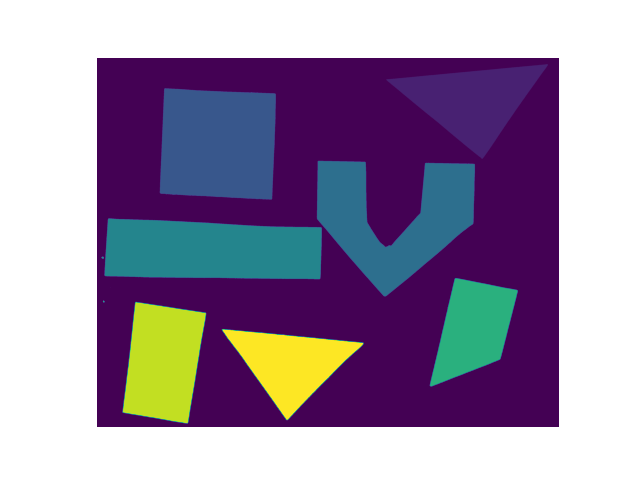

In [3]:
labeled_image, count = connected_components(filename="tutorial_figures/data/shapes-01.jpg",
                                            sigma = 2.0,
                                            t = 0.9,
                                            connectivity=2)

fig, ax = plt.subplots()
ax.imshow(labeled_image)
ax.set_axis_off()

print("dtype:", labeled_image.dtype)
print("min:", np.min(labeled_image))
print("max:", np.max(labeled_image))

# fig, ax = plt.subplots()
# ax.imshow(labeled_image, vmin=np.min(labeled_image), vmax=np.max(labeled_image))

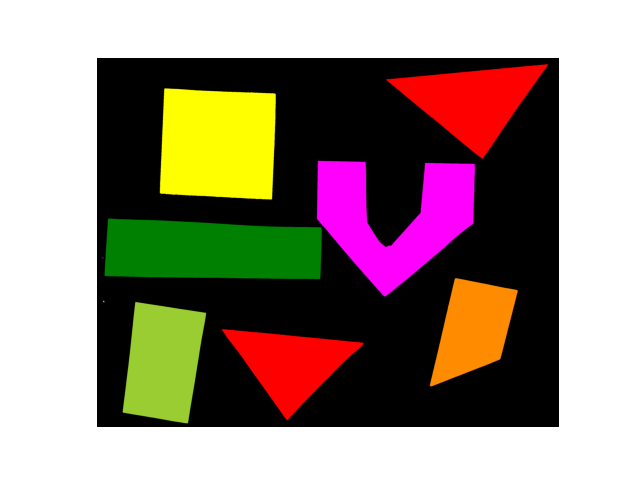

In [4]:
# convert label image to color image
colored_label_image = ski.color.label2rgb(labeled_image, bg_label=0)

fig, ax = plt.subplots()
ax.imshow(colored_label_image)
ax.set_axis_off()


In [5]:
# Compute object features and extract object areas:

object_features = ski.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
object_areas

[318539.0,
 1.0,
 523207.0,
 496622.0,
 517330.0,
 143.0,
 256215.0,
 1.0,
 69.0,
 338787.0,
 265767.0]

Text(0, 0.5, 'Number of objects')

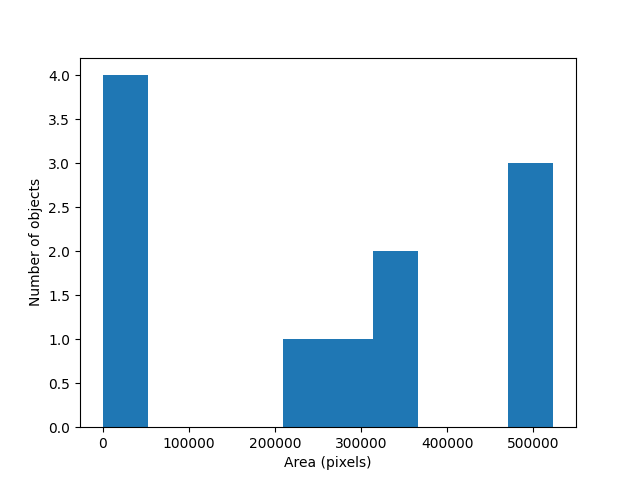

In [6]:
# Histogram of object area distribution


fig, ax = plt.subplots()
ax.hist(object_areas)
ax.set_xlabel("Area (pixels)")
ax.set_ylabel("Number of objects")

In [7]:
# Filter objects by area:

min_area = 200
large_objects = []
for objf in object_features:
    if objf["area"] > min_area:
        large_objects.append(objf["label"])

print("Found", len(large_objects), "objects!")

Found 7 objects!


In [8]:
# Alternate method
object_areas = np.array([objf["area"] for objf in object_features])
object_labels = np.array([objf["label"] for objf in object_features])
large_objects = object_labels[object_areas > min_area]
print("Found", len(large_objects), "objects!")

Found 7 objects!
